In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Data Analysis :

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
df.isnull().sum()  #To check for Null Values 

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

## Exploratory Data Analysis :

In [7]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

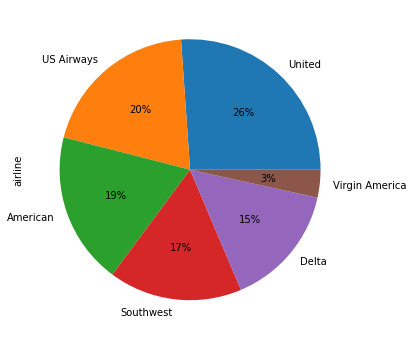

In [8]:
plt.figure(figsize=(12,6))
df.airline.value_counts().plot(kind='pie',autopct='%1.0f%%')

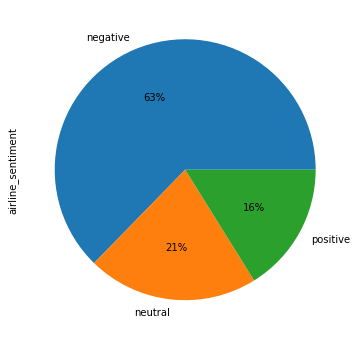

In [9]:
plt.figure(figsize=(12,6))
df.airline_sentiment.value_counts().plot(kind='pie',autopct='%1.0f%%')

<Figure size 1008x576 with 0 Axes>

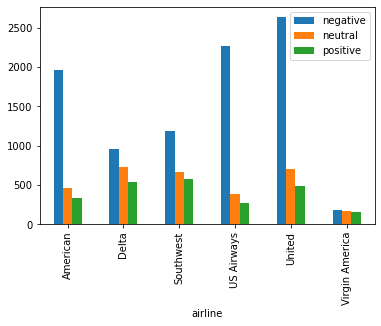

In [10]:
plt.figure(figsize=(14,8))
df.groupby(['airline','airline_sentiment'])['airline_sentiment'].count().unstack().plot(kind='bar')
plt.legend()

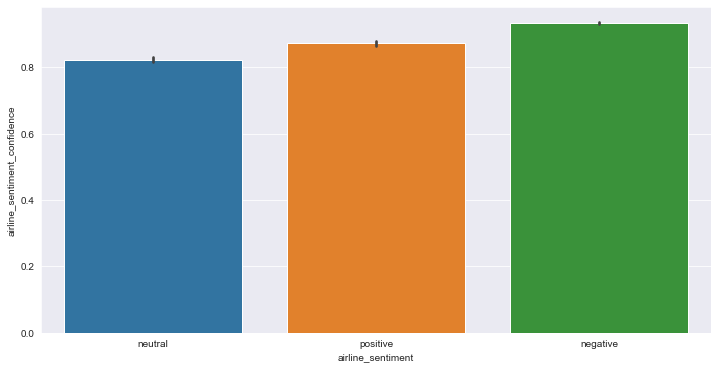

In [11]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.barplot(x='airline_sentiment',y='airline_sentiment_confidence',data=df)

In [12]:
df.corr()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
tweet_id,1.000000,0.024840,0.021533,-0.008852
airline_sentiment_confidence,0.024840,1.000000,0.685879,0.012581
negativereason_confidence,0.021533,0.685879,1.000000,0.021574
retweet_count,-0.008852,0.012581,0.021574,1.000000


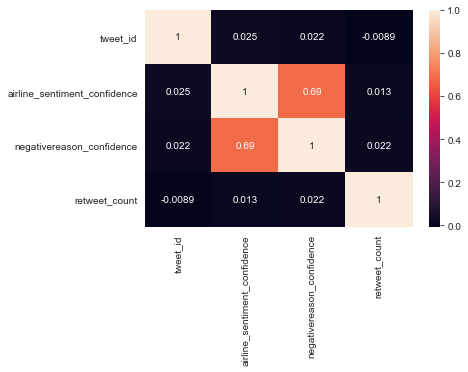

In [13]:
sns.heatmap(df.corr(),annot=True)

## Data Cleaning :

#### Tweets contain many slang words and punctuation marks. We need to clean our tweets before they can be used for training the machine learning model. However, before cleaning the tweets, let's divide our dataset into feature and label sets.

In [14]:
features=df.iloc[:,10]


In [15]:
features

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [16]:
labels=df.iloc[:,1]

In [17]:
labels

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

## Text Cleaning :

In [18]:
import re
from nltk.corpus import stopwords
import string


In [19]:
process_feat=[]

for text in range(0,len(features)):
    process_feats=re.sub('[^a-zA-Z]' , " ",str(features[text]))
    #process_feats=[x.lower() for x in process_feats.split() if x.lower() not in stopwords.words('english')]
    
    
   
    process_feat.append(process_feats)

In [20]:
process_feat

[' VirginAmerica What  dhepburn said ',
 ' VirginAmerica plus you ve added commercials to the experience    tacky ',
 ' VirginAmerica I didn t today    Must mean I need to take another trip ',
 ' VirginAmerica it s really aggressive to blast obnoxious  entertainment  in your guests  faces  amp  they have little recourse',
 ' VirginAmerica and it s a really big bad thing about it',
 ' VirginAmerica seriously would pay     a flight for seats that didn t have this playing  it s really the only bad thing about flying VA',
 ' VirginAmerica yes  nearly every time I fly VX this  ear worm  won t go away   ',
 ' VirginAmerica Really missed a prime opportunity for Men Without Hats parody  there  https   t co mWpG grEZP',
 ' virginamerica Well  I didn t but NOW I DO    D',
 ' VirginAmerica it was amazing  and arrived an hour early  You re too good to me ',
 ' VirginAmerica did you know that suicide is the second leading cause of death among teens      ',
 ' VirginAmerica I  lt   pretty graphics  

In [21]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [22]:
cv=CountVectorizer(ngram_range=(1,2),stop_words=stopwords.words('english'))
tfidft=TfidfTransformer()
tfidfv=TfidfVectorizer()
rand_mod=RandomForestClassifier(n_estimators=200,random_state=0)

## Set1 :( CountVectoriser + TFIDFtransformer + Random Forests Classifier,NaiveBayes Classifier )

In [23]:
cvprocess_words=cv.fit_transform(process_feat)

In [24]:
data=tfidft.fit_transform(cvprocess_words)

## Train Test Split :

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [27]:
rand_mod.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
rand_mod.predict(X_test)

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [29]:
pred1=rand_mod.predict(X_test)

In [30]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

    negative       0.76      0.95      0.85      1870
     neutral       0.65      0.37      0.47       614
    positive       0.84      0.47      0.60       444

    accuracy                           0.76      2928
   macro avg       0.75      0.60      0.64      2928
weighted avg       0.75      0.76      0.73      2928



In [31]:
accuracy_score(y_test,pred1)

0.7564890710382514

In [33]:
mnb=MultinomialNB()

In [34]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
mnb.predict(X_test)

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

In [36]:
print(classification_report(y_test,mnb.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.67      0.99      0.80      1870
     neutral       0.74      0.10      0.18       614
    positive       0.89      0.11      0.20       444

    accuracy                           0.67      2928
   macro avg       0.77      0.40      0.39      2928
weighted avg       0.72      0.67      0.58      2928



In [37]:
accuracy_score(y_test,mnb.predict(X_test))

0.6734972677595629

# Set 2: ( Random Forest Classifier + TfidfVectoriser )

In [38]:
tfidf_cust_vec=TfidfVectorizer(ngram_range=(1,2),max_features=3500,max_df=0.90,min_df=10,stop_words=stopwords.words('english'))

In [39]:
tfidf_cust_vec.fit_transform(process_feat)

<14640x2518 sparse matrix of type '<class 'numpy.float64'>'
	with 139925 stored elements in Compressed Sparse Row format>

In [40]:
data2=tfidf_cust_vec.fit_transform(process_feat)

In [41]:
X1_train, X1_test, y1_train, y1_test = train_test_split(data2, labels, test_size=0.2, random_state=0)

In [42]:
rand_mod.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [43]:
rand_mod.predict(X1_test)

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [44]:
pred2=rand_mod.predict(X1_test)

In [45]:
print(classification_report(y1_test,pred2))

              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.41      0.49       614
    positive       0.73      0.54      0.62       444

    accuracy                           0.75      2928
   macro avg       0.70      0.62      0.65      2928
weighted avg       0.74      0.75      0.74      2928



In [46]:
accuracy_score(y1_test,pred2)

0.7547814207650273

# Set 3 : ( NaiveBayes Classifier + TfidfVectoriser )

In [47]:
mnb=MultinomialNB()

In [48]:
mnb.fit(X1_train,y1_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
mnb.predict(X1_test)

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

In [50]:
pred3=mnb.predict(X1_test)

In [51]:
print(classification_report(y1_test,pred3))

              precision    recall  f1-score   support

    negative       0.76      0.96      0.85      1870
     neutral       0.71      0.36      0.47       614
    positive       0.81      0.48      0.60       444

    accuracy                           0.76      2928
   macro avg       0.76      0.60      0.64      2928
weighted avg       0.76      0.76      0.73      2928



In [52]:
accuracy_score(y1_test,pred3)

0.7616120218579235

## Set 4:( Support Vector Machines Classifier + TfidfVectoriser )

In [53]:
svm_mod=SVC()

In [54]:
svm_mod.fit(X1_train,y1_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
svm_mod.predict(X1_test)

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [56]:
print(classification_report(y1_test,svm_mod.predict(X1_test)))

              precision    recall  f1-score   support

    negative       0.80      0.94      0.86      1870
     neutral       0.67      0.43      0.53       614
    positive       0.81      0.57      0.67       444

    accuracy                           0.78      2928
   macro avg       0.76      0.65      0.69      2928
weighted avg       0.77      0.78      0.76      2928



In [57]:
accuracy_score(y1_test,svm_mod.predict(X1_test))

0.780396174863388

In [64]:
df2=pd.DataFrame({'Actual Class':y1_test,'Predicted Class':svm_mod.predict(X1_test)})

In [65]:
df2.head(10)

,Actual Class,Predicted Class
13983,negative,negative
14484,negative,negative
6403,negative,negative
9653,negative,negative
13268,negative,positive
2384,neutral,negative
9613,negative,negative
11612,negative,negative
9252,negative,negative
13923,negative,negative


## Set 5 : ( Logistic Regresssion + TfidfVectoriser )

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logm=LogisticRegression()

In [60]:
logm.fit(X1_train,y1_train)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
logm.predict(X1_test)

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [62]:
print(classification_report(y1_test,logm.predict(X1_test)))

              precision    recall  f1-score   support

    negative       0.81      0.93      0.87      1870
     neutral       0.64      0.48      0.55       614
    positive       0.80      0.60      0.68       444

    accuracy                           0.78      2928
   macro avg       0.75      0.67      0.70      2928
weighted avg       0.77      0.78      0.77      2928



In [63]:
accuracy_score(y1_test,logm.predict(X1_test))

0.7831284153005464

##### Okkay.. SO as Per my trials, i can say that the best combination-SET-4  , which is TfidfVectoriser + Support Vector Machines as a classifier , has resulted in highest Accuracy..That is 78 %